# Things to Do

## Analysis
For this section we will perform time series analysis by creating a **Sentiment** over time for the following use cases:
    - General users from sample (Two lines, one positive and one negative)
    - Ten specific users from sample
    - 

From there we will also create a time series graph for **word frequency** over the year for the following use cases:
    - Top ten users
    - Most Active Subreddits

This analysis will show us if there is a link between increased word frequency of incel language 

In [1]:

import warnings
import pandas as pd
import time
timestr = time.strftime("%Y%m%d-%H%M%S")

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

from collections import Counter
from textblob import TextBlob
from statsmodels.tsa.stattools import adfuller

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:

def basic_time_series(df: pd.DataFrame, col_name: str):
    data_count = df[col_name]
    rollavg = df[col_name].rolling(window=12, step=1).mean()
    rollvar = df[col_name].rolling(window=12, step=1).var()
    
    if(col_name == 'polarity'):
        col_name = col_name.capitalize()
    else:
        col_name = ' '.join(w.capitalize() for w in col_name.split('_'))    
        
    # Plot them out
    plt.plot(data_count, label=col_name)
    plt.plot(rollavg, label='Rolling Mean')
    plt.plot(rollvar, label='Rolling Variance')
    plt.legend(loc='best')
    return plt


In [4]:
def adft_calculate(series: pd.Series):
    adft = adfuller(series, autolag='AIC')
    aic = pd.DataFrame({"Values":[adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
                        "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                  "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
    return aic

In [5]:
def autocorr_check(series: pd.Series):
    corr_list = []
    for i in [1, 3, 6, 9]:
        lag =series.autocorr(lag=i)
        corr_list.append(lag)
        print(f'{i} Month Lag: ', lag)

In [6]:
def corpus(text):
    text_list = text.split()
    return text_list

In [7]:
edaIncelDF = pd.read_csv('../data/EDA_incelDF20230615-150301.csv')


In [8]:
edaIncelDF['created_on'] = edaIncelDF['created_on'].astype('datetime64[us]')

In [9]:
edaIncelDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109289 entries, 0 to 109288
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   created_on        109289 non-null  datetime64[ns]
 1   subreddit         109289 non-null  object        
 2   score             109289 non-null  int64         
 3   clean_tokenize    109251 non-null  object        
 4   tokenized_text    109289 non-null  object        
 5   comment_length    109289 non-null  int64         
 6   incel_word_freq   109289 non-null  int64         
 7   incel_word_ratio  109289 non-null  float64       
 8   clean_sentiment   109226 non-null  object        
 9   sentiment_flag    109289 non-null  object        
 10  polarity          109289 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 9.2+ MB


In [10]:
edaIncelDF.describe()

,score,comment_length,incel_word_freq,incel_word_ratio,polarity
count,109289.000000,109289.000000,109289.000000,109289.000000,109289.000000
mean,0.597691,70.870078,2.561749,0.054644,0.165520
std,4.416717,76.148606,2.629011,0.067756,0.616572
min,-64.000000,1.000000,0.000000,0.000000,-0.999700
25%,-1.000000,25.000000,1.000000,0.025000,-0.361200
50%,0.000000,49.000000,2.000000,0.040000,0.268200
75%,2.000000,90.000000,3.000000,0.063063,0.743000
max,203.000000,1967.000000,101.000000,3.000000,0.999700


In [11]:
edaIncelDF = edaIncelDF.set_index('created_on')
edaIncelDF.index

DatetimeIndex(['2020-01-30', '2020-01-03', '2020-01-23', '2020-01-14',
               '2020-01-10', '2020-01-18', '2019-12-31', '2020-01-05',
               '2020-01-22', '2020-01-09',
               ...
               '2020-12-25', '2020-12-25', '2020-12-25', '2020-12-26',
               '2020-12-28', '2020-12-29', '2020-12-29', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='created_on', length=109289, freq=None)

Two Average Incel Word to Comment Ratio over Time plots were created, per day and per month. In the per day time series plot we see that there is no clear trend for an increase in incel word usage. When viewed in a per month plot we see that in the beginning of 2020 we see a sharp increase

## Word Tokenization

In [15]:
text = str(edaIncelDF['clean_tokenize'].to_list())
blob = TextBlob(text)

In [ ]:
pos_df = pd.DataFrame(blob.tags, columns= ['word','pos'])

In [ ]:
pos_df_count = pos_df.pos.value_counts()[:20]
pos_labels = pos_df_count.index.values

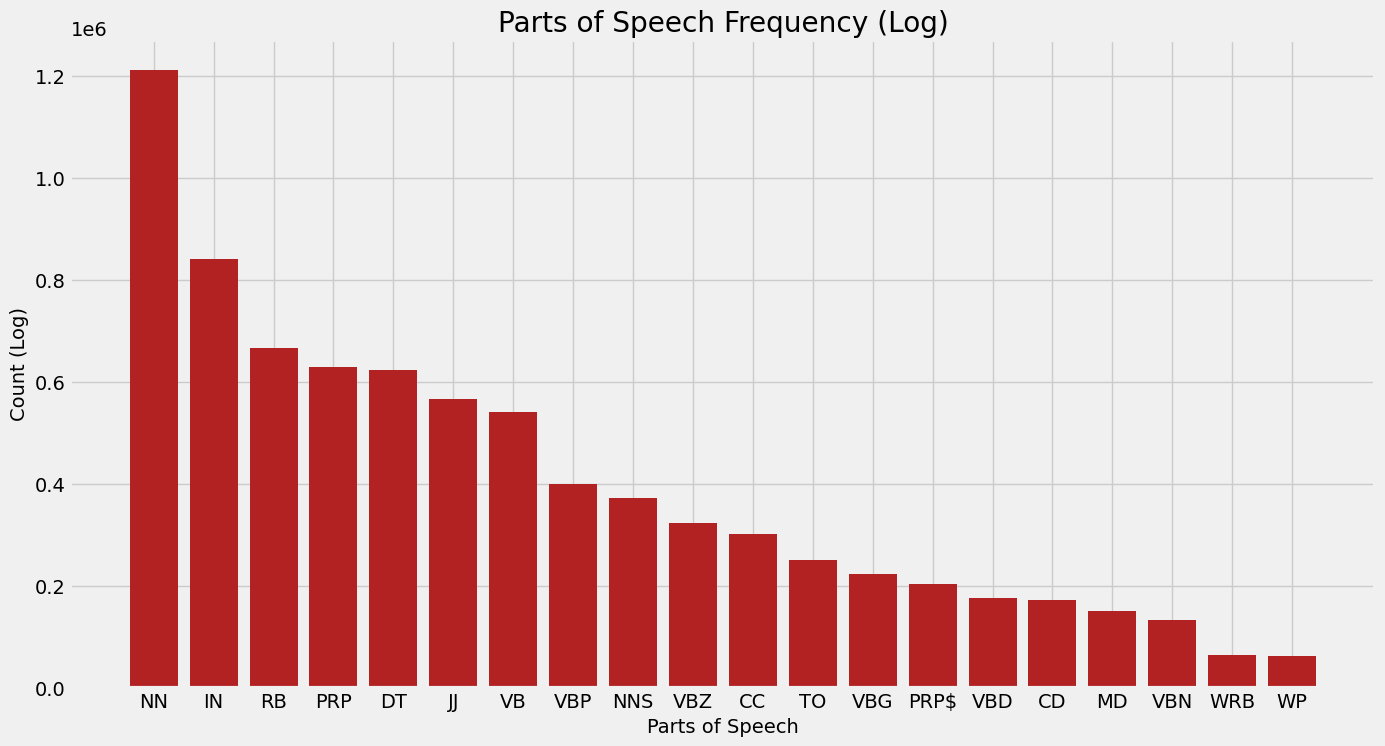

In [ ]:
fig, ax = plt.subplots()
ax.bar(pos_labels, pos_df_count, color='firebrick')
plt.ylabel('Count (Log)')
plt.xlabel('Parts of Speech')
plt.title('Parts of Speech Frequency (Log)')
plt.show()

In [ ]:
text_list = edaIncelDF['clean_sentiment'].apply(lambda x: corpus(str(x)))

In [ ]:
corpus = text_list[1]

In [ ]:
mostCommon = Counter(corpus).most_common(10)

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

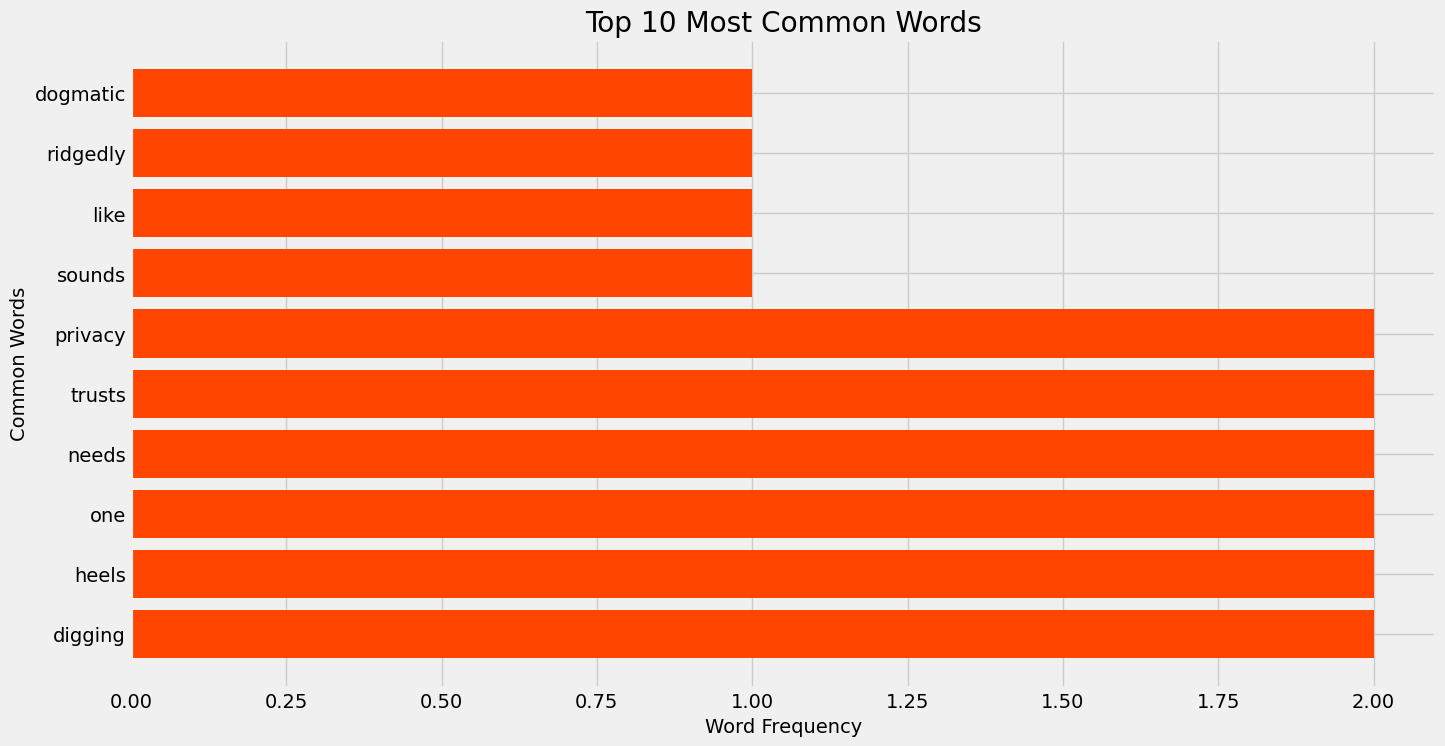

In [ ]:
fig, ax = plt.subplots()
ax.barh(words, freq, color='orangered')
plt.title('Top 10 Most Common Words')
plt.xlabel('Word Frequency')
plt.ylabel('Common Words')
plt.show()

##### Results

The text frequency shows that a majority of the words used in these subreddits to be NN, IN, RB, PRP, DT, JJ and VB. This means that the comments tend to talk about a subject and many of the otherwords place these onjects in different positions or attached to a verb. By examining the common words based on word frequency we see that 'digging', 'heels', 'one', 'needs', 'trusts', 'privacy'. The word 'digging could belong to a n-gram of 'digging one's heels' which is usually a term to discribe someone who is stuborn and does not change their opions or stance on a subject. The word 'trust', 'needs', and 'privacy' possible belong to the context of a relationship. An obvious outlier is the word 'dogmatic'. The word tends to attach itself to talks of ideologies or ways of thinking. Ideologies that are described as 'dogmatic' could indicate that their beliefs are the only correct way. This echoes the incel or other harmful ideologied previously mentioned.

## Sentiment Analysis

In [ ]:
grouped = edaIncelDF.groupby('subreddit')['sentiment_flag'].value_counts()

In [ ]:
# Use for Discussion
unstacked = grouped.unstack(level=1).sort_values(by='subreddit', ascending=False).head(20)

In [ ]:
unstacked = unstacked[['pos', 'neg', 'neu']]

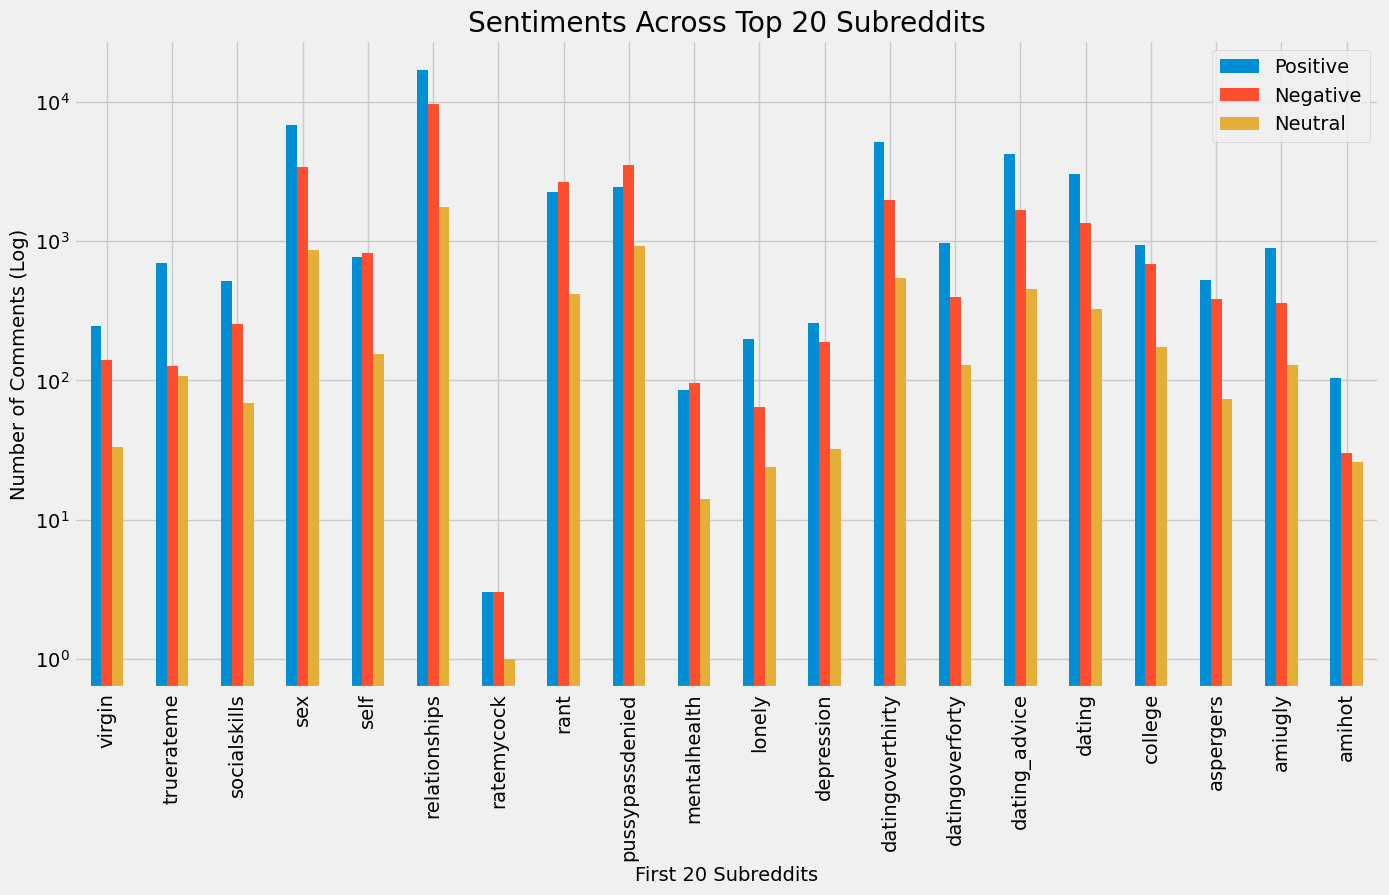

In [ ]:
unstacked.plot.bar()
plt.yscale('log')
plt.ylabel('Number of Comments (Log)')
plt.xlabel('First 20 Subreddits')
plt.title('Sentiments Across Top 20 Subreddits')
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.show()

##### Results
Out of the fist 20 subreddits only three have more negative subreddits. The communities 'self', 'rant', 'pussypassdenied' and 'mentalhealth' have a slightly higher levels of negative sentiments than the rest of the subreddits. Additionally, 'ratemycock' has an equal amount of positive and negative sentiments.


## Time Series Analysis

In this section we performed a time series decomposition over the main numerical columns: 'incel_word_freq', 'incel_word_ratio', and 'polarity'

In [17]:
newDF = edaIncelDF[['incel_word_freq', 'incel_word_ratio', 'polarity']].groupby(['created_on']).mean()

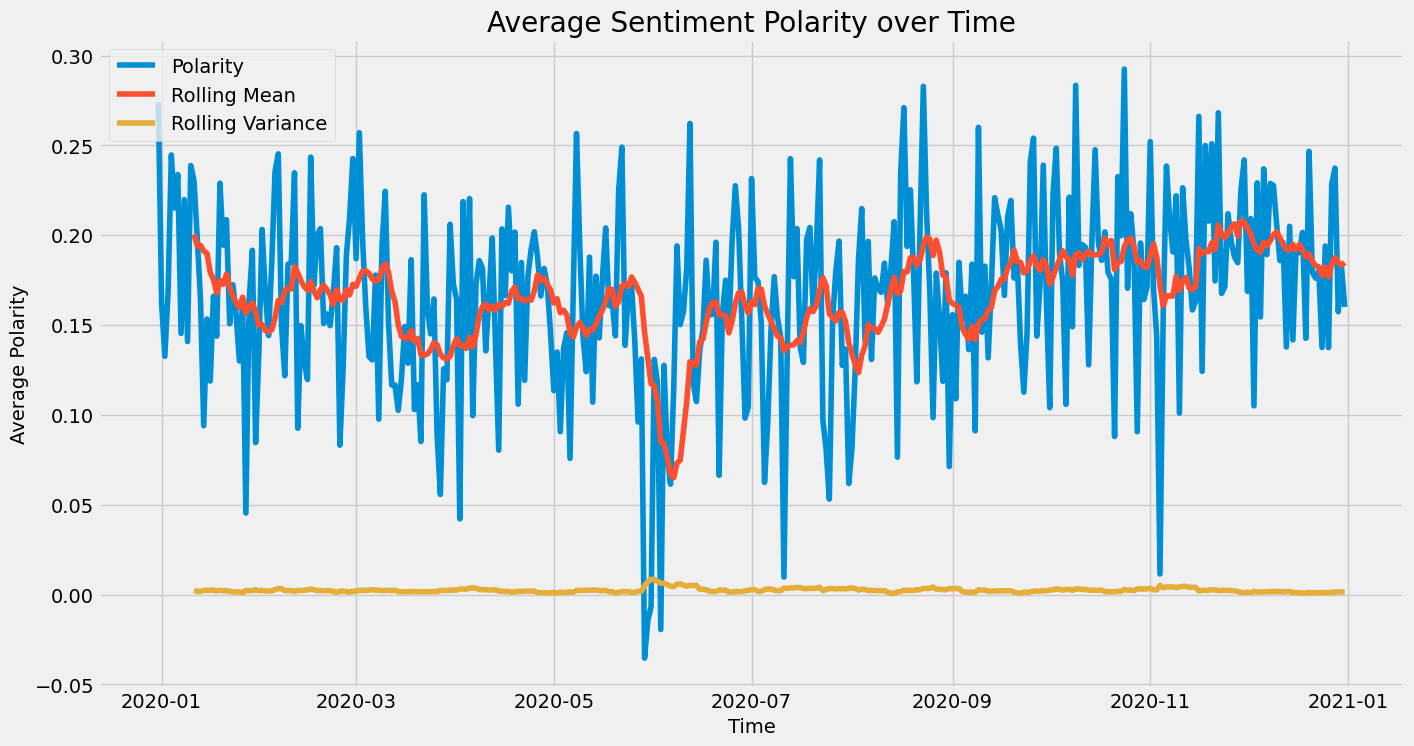

In [ ]:
pol_series = basic_time_series(newDF, 'polarity')
pol_series.xlabel('Time')
pol_series.ylabel('Average Polarity')
pol_series.title('Average Sentiment Polarity over Time')
pol_series.show()

In [ ]:
aic_polarity = adft_calculate(newDF['polarity'])
print(aic_polarity)

       Values                       Metric
0   -4.810137              Test Statistics
1    0.000052                      p-value
2    8.000000             No. of lags used
3  358.000000  Number of observations used
4   -3.448749          critical value (1%)
5   -2.869647          critical value (5%)
6   -2.571089         critical value (10%)


In [ ]:
autocorr_check(newDF['polarity'])

1 Month Lag:  0.23426692021365728
3 Month Lag:  0.03819783058864795
6 Month Lag:  0.1693348942653536
9 Month Lag:  -0.02463522577168848


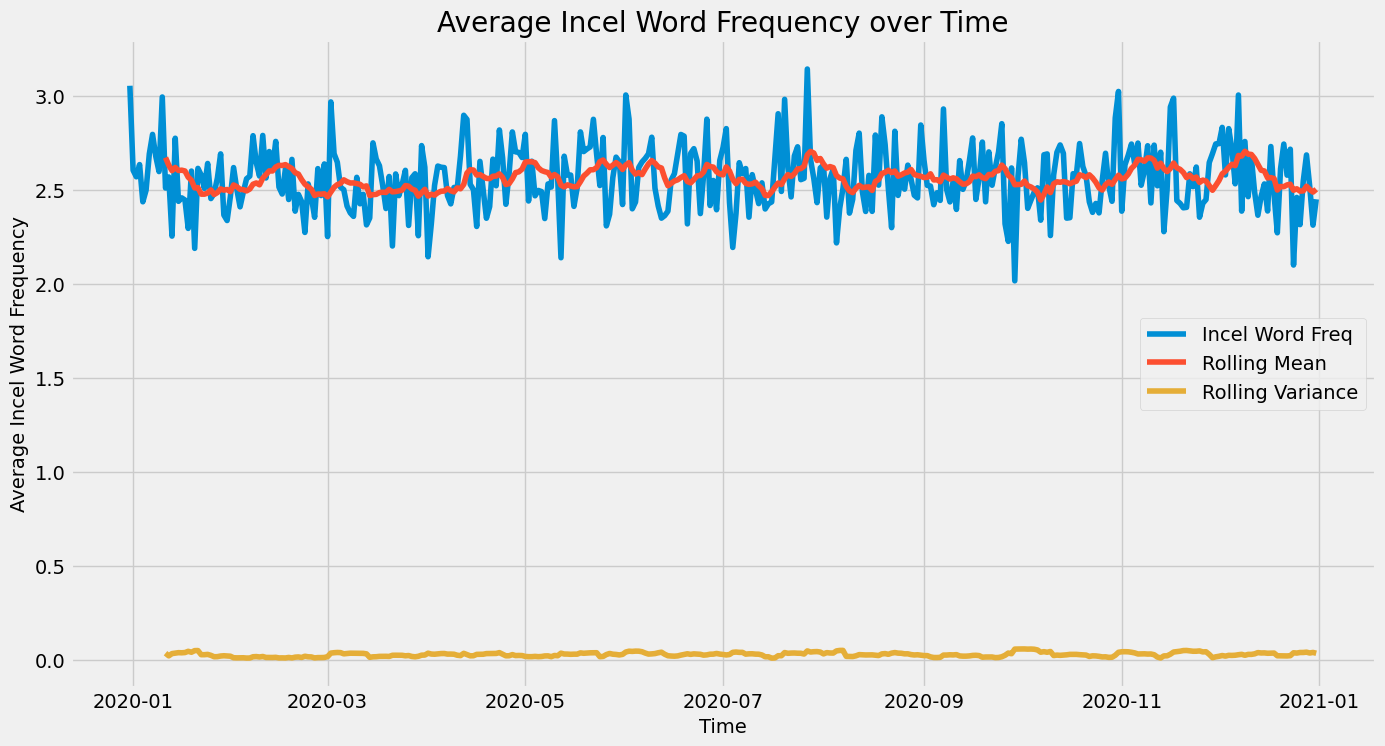

In [18]:

incel_word_series = basic_time_series(newDF, 'incel_word_freq')
incel_word_series.xlabel('Time')
incel_word_series.ylabel('Average Incel Word Frequency')
incel_word_series.title('Average Incel Word Frequency over Time')
incel_word_series.show()

In [ ]:
aic_incel_word_freq = adft_calculate(newDF['incel_word_freq'])
print(aic_incel_word_freq)

         Values                       Metric
0 -1.745204e+01              Test Statistics
1  4.647002e-30                      p-value
2  0.000000e+00             No. of lags used
3  3.660000e+02  Number of observations used
4 -3.448344e+00          critical value (1%)
5 -2.869469e+00          critical value (5%)
6 -2.570994e+00         critical value (10%)


In [ ]:
autocorr_check(newDF['incel_word_freq'])

1 Month Lag:  0.10044427487387346
3 Month Lag:  0.001228841367215301
6 Month Lag:  -0.035330340249693414
9 Month Lag:  -0.08855215389874592


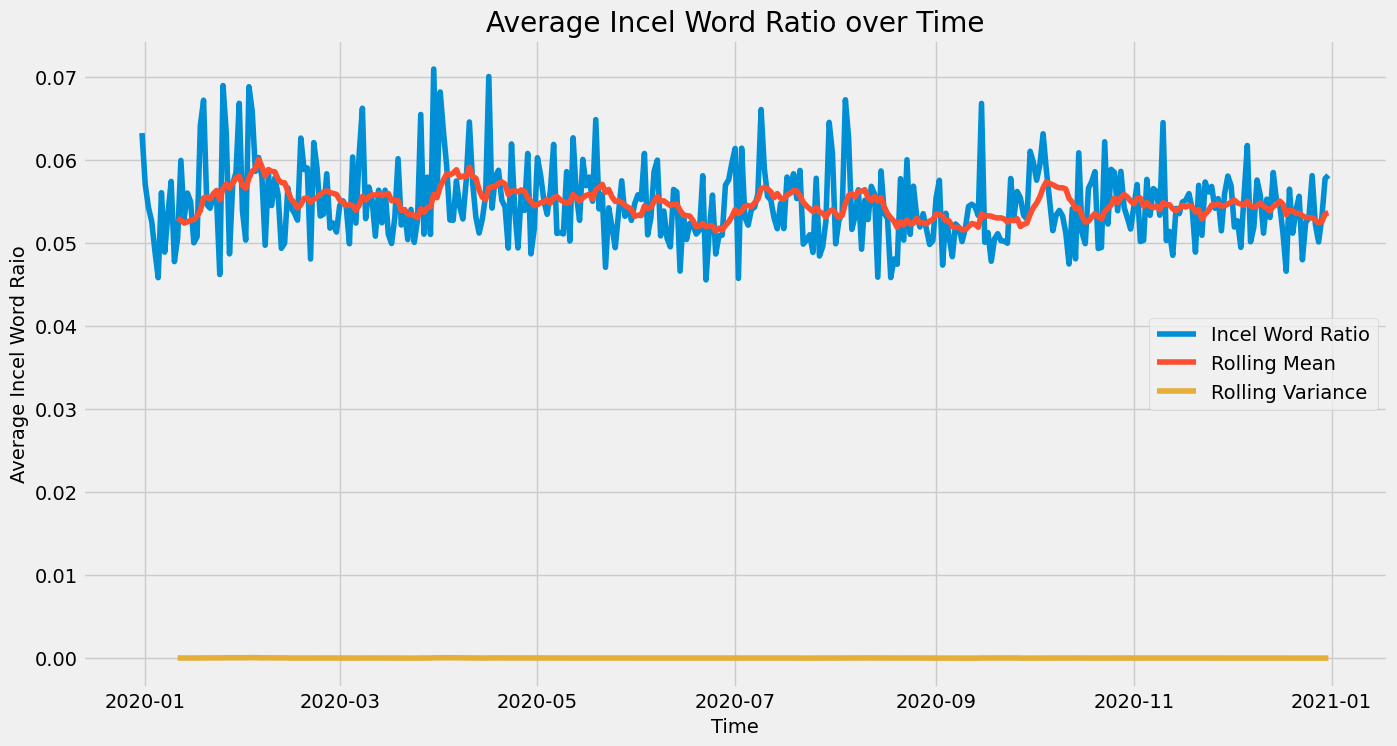

In [19]:
incel_ratio_series = basic_time_series(newDF, 'incel_word_ratio')
incel_ratio_series.xlabel('Time')
incel_ratio_series.ylabel('Average Incel Word Raio')
incel_ratio_series.title('Average Incel Word Ratio over Time')
incel_ratio_series.show()

In [459]:
aic_incel_word_ratio = adft_calculate(newDF['incel_word_ratio'])
print(aic_incel_word_ratio)

         Values                       Metric
0 -1.766614e+01              Test Statistics
1  3.662888e-30                      p-value
2  0.000000e+00             No. of lags used
3  3.660000e+02  Number of observations used
4 -3.448344e+00          critical value (1%)
5 -2.869469e+00          critical value (5%)
6 -2.570994e+00         critical value (10%)


In [469]:
autocorr_check(newDF['incel_word_ratio'])

1 Month Lag:  0.0810114346245594
3 Month Lag:  0.05028106623013687
6 Month Lag:  -0.002845491672673178
9 Month Lag:  -0.013635558982988046


## Sentiment Over Time

The dataframe was split based on their sentiment flag value and dataframes were created. Each frame carried the date index, incel word frequency and incel word ratio. Once split we then get the valu counts fed the dataframes into the time_plot function and set the window as weekly. This generated a time series plot for the year and

In [228]:
# Sentiment over time
# Split the sentiment into three groups
sentiments_pos = edaIncelDF[edaIncelDF['sentiment_flag'] == 'pos']
sentiments_neg = edaIncelDF[edaIncelDF['sentiment_flag'] == 'neg']
sentiments_neu = edaIncelDF[edaIncelDF['sentiment_flag'] == 'neu']

In [407]:
sent_pos_count = sentiments_pos['polarity'].groupby('created_on').count()
sent_neg_count = sentiments_neg['polarity'].groupby('created_on').count()
sent_neu_count = sentiments_neu['polarity'].groupby('created_on').count()

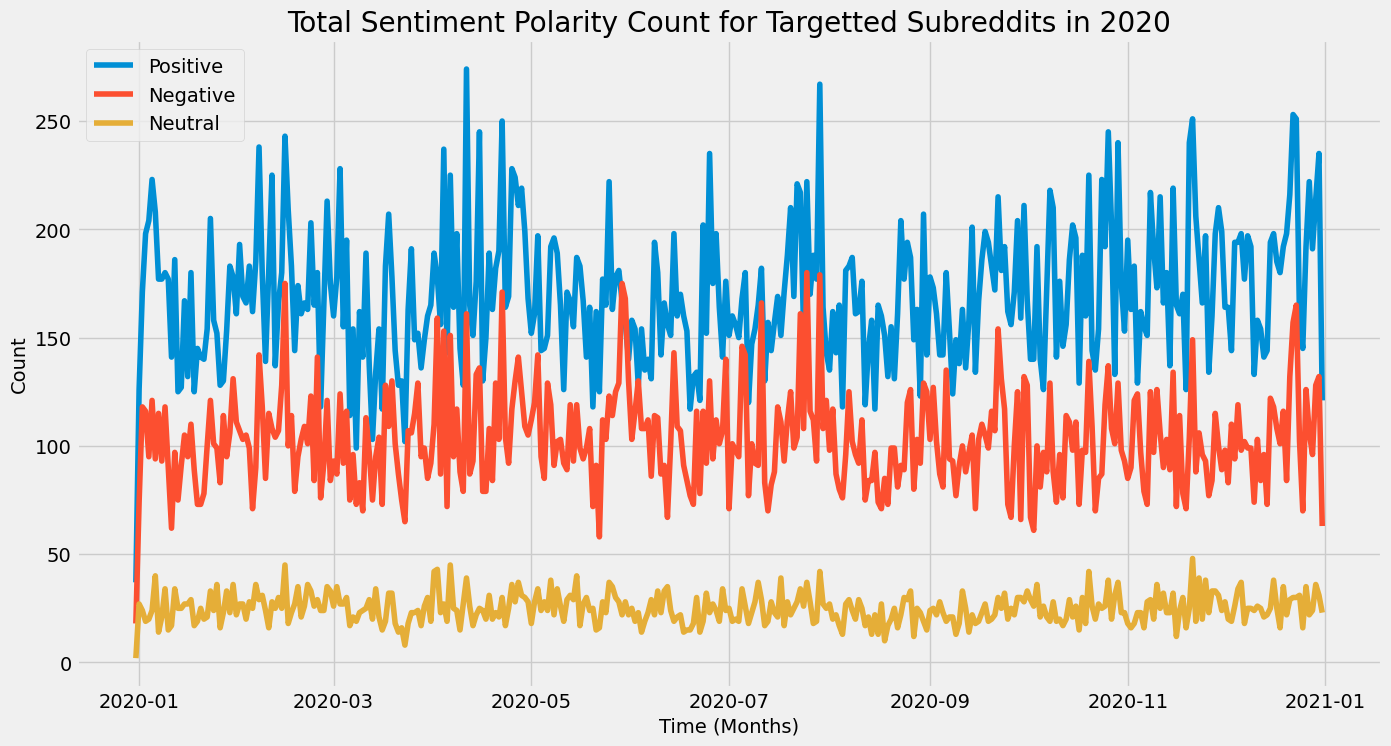

In [447]:
plt.plot(sent_pos_count)
plt.plot(sent_neg_count)
plt.plot(sent_neu_count)
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.xlabel('Time (Months)')
plt.ylabel('Count')
plt.title('Total Sentiment Polarity Count for Targetted Subreddits in 2020')
plt.show()